### dev_notebook_

- Your development environment...

In [1]:
import duckdb
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt

In [2]:
conn = duckdb.connect("../data/bicimad.db",read_only=True)

In [3]:
pd.set_option('mode.chained_assignment',None)

In [4]:
df = conn.execute('SELECT name, "geometry.coordinates" AS Coordinates, address AS "Station Location"  FROM bicimad_stations').fetch_df()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              264 non-null    object
 1   Coordinates       264 non-null    object
 2   Station Location  264 non-null    object
dtypes: object(3)
memory usage: 6.3+ KB


In [6]:
df

,name,Coordinates,Station Location
0,1a - Puerta del Sol A,"[-3.7018341, 40.4172137]",Puerta del Sol nº 1
1,1b - Puerta del Sol B,"[-3.701602938060457, 40.41731271011562]",Puerta del Sol nº 1
2,2 - Miguel Moya,"[-3.7058415, 40.4205886]",Calle Miguel Moya nº 1
3,3 - Plaza Conde Suchil,"[-3.7069171, 40.4302937]",Plaza del Conde del Valle de Súchil nº 3
4,4 - Malasaña,"[-3.7025875, 40.4285524]",Calle Manuela Malasaña nº 5
...,...,...,...
259,257 - INEF,"[-3.72997, 40.43896]",Avenida Juan de Herrera frente a la calle Paul...
260,258 - Ciudad Universitaria 1,"[-3.72699, 40.44375]",Avenida de la Complutense (Metro Ciudad Univer...
261,259 - Ciudad Universitaria 2,"[-3.72693, 40.44342]",Avenida de la Complutense (Metro Ciudad Univer...
262,260 - Facultad Biología,"[-3.7272945, 40.4483322]",Calle José Antonio Novais frente al nº 12


In [7]:

df['name'] = df['name'].str.replace('^(\S)* - ', '', regex=True)
df

,name,Coordinates,Station Location
0,Puerta del Sol A,"[-3.7018341, 40.4172137]",Puerta del Sol nº 1
1,Puerta del Sol B,"[-3.701602938060457, 40.41731271011562]",Puerta del Sol nº 1
2,Miguel Moya,"[-3.7058415, 40.4205886]",Calle Miguel Moya nº 1
3,Plaza Conde Suchil,"[-3.7069171, 40.4302937]",Plaza del Conde del Valle de Súchil nº 3
4,Malasaña,"[-3.7025875, 40.4285524]",Calle Manuela Malasaña nº 5
...,...,...,...
259,INEF,"[-3.72997, 40.43896]",Avenida Juan de Herrera frente a la calle Paul...
260,Ciudad Universitaria 1,"[-3.72699, 40.44375]",Avenida de la Complutense (Metro Ciudad Univer...
261,Ciudad Universitaria 2,"[-3.72693, 40.44342]",Avenida de la Complutense (Metro Ciudad Univer...
262,Facultad Biología,"[-3.7272945, 40.4483322]",Calle José Antonio Novais frente al nº 12


In [8]:

df['Station Location'] = df['Station Location'].str.replace(' nº', ',', regex=True)
df

,name,Coordinates,Station Location
0,Puerta del Sol A,"[-3.7018341, 40.4172137]","Puerta del Sol, 1"
1,Puerta del Sol B,"[-3.701602938060457, 40.41731271011562]","Puerta del Sol, 1"
2,Miguel Moya,"[-3.7058415, 40.4205886]","Calle Miguel Moya, 1"
3,Plaza Conde Suchil,"[-3.7069171, 40.4302937]","Plaza del Conde del Valle de Súchil, 3"
4,Malasaña,"[-3.7025875, 40.4285524]","Calle Manuela Malasaña, 5"
...,...,...,...
259,INEF,"[-3.72997, 40.43896]",Avenida Juan de Herrera frente a la calle Paul...
260,Ciudad Universitaria 1,"[-3.72699, 40.44375]",Avenida de la Complutense (Metro Ciudad Univer...
261,Ciudad Universitaria 2,"[-3.72693, 40.44342]",Avenida de la Complutense (Metro Ciudad Univer...
262,Facultad Biología,"[-3.7272945, 40.4483322]","Calle José Antonio Novais frente al, 12"


In [9]:
coo = df['Coordinates']

In [10]:
coo[0]

'[-3.7018341, 40.4172137]'

In [11]:
df['latitud'] = [float(df['Coordinates'][i].split(",")[1][:-1]) for i in range(len(df))]


In [12]:

df['longitud'] = [float(df['Coordinates'][i].split(",")[0][1:-1]) for i in range(len(df))]

In [13]:
df['longitud']

0     -3.701834
1     -3.701603
2     -3.705841
3     -3.706917
4     -3.702587
         ...   
259   -3.729900
260   -3.726900
261   -3.726900
262   -3.727294
263   -3.729300
Name: longitud, Length: 264, dtype: float64

In [14]:
df2 = df[['name', 'latitud', 'longitud', 'Station Location']]

In [15]:
df1.info()

NameError: name 'df1' is not defined

In [16]:
df2

,name,latitud,longitud,Station Location
0,Puerta del Sol A,40.417214,-3.701834,"Puerta del Sol, 1"
1,Puerta del Sol B,40.417313,-3.701603,"Puerta del Sol, 1"
2,Miguel Moya,40.420589,-3.705841,"Calle Miguel Moya, 1"
3,Plaza Conde Suchil,40.430294,-3.706917,"Plaza del Conde del Valle de Súchil, 3"
4,Malasaña,40.428552,-3.702587,"Calle Manuela Malasaña, 5"
...,...,...,...,...
259,INEF,40.438960,-3.729900,Avenida Juan de Herrera frente a la calle Paul...
260,Ciudad Universitaria 1,40.443750,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
261,Ciudad Universitaria 2,40.443420,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
262,Facultad Biología,40.448332,-3.727294,"Calle José Antonio Novais frente al, 12"


In [17]:
response = requests.get('https://datos.madrid.es/egob/catalogo/200215-0-instalaciones-deportivas.json')

In [18]:
response

<Response [200]>

In [19]:
type(response)

requests.models.Response

In [20]:
centers = response.json()
graph = centers['@graph']

In [21]:
centers.keys()

dict_keys(['@context', '@graph'])

In [22]:
len(graph)

503

In [23]:
title = [i['title'] for i in graph]
title

['Instalación Deportiva  Básica Embalse de San Juan',
 'Instalación Deportiva Básica Alto del Retiro',
 'Instalación Deportiva Básica Avenida de Cerro Milano',
 'Instalación Deportiva Básica Avenida de las Suertes',
 'Instalación Deportiva Básica Avenida del Ensanche de Vallecas',
 'Instalación Deportiva Básica Avenida del Mediterráneo',
 'Instalación Deportiva Básica Camino de la Suerte',
 'Instalación Deportiva Básica Circuito de Automodelismo',
 'Instalación Deportiva Básica Colonia Vilda',
 'Instalación Deportiva Básica Eduardo Chillida',
 'Instalación Deportiva Básica Jardines de José Luis Sampedro (junto al Centro Cultural Galileo)',
 'Instalación Deportiva Básica Jardines del Teniente Alcalde',
 'Instalación Deportiva Básica La Unión',
 'Instalación Deportiva Básica Nuestra Señora de la Torre',
 'Instalación Deportiva Básica P.A.R. Castrillo de Aza',
 'Instalación Deportiva Básica Parkour',
 'Instalación Deportiva Básica Parque Real de Arganda',
 'Instalación Deportiva Básica Pa

In [24]:
len(title)

503

In [25]:
graph[0]

{'@id': 'https://datos.madrid.es/egob/catalogo/tipo/entidadesyorganismos/11353987-instalacion-deportiva-basica-embalse-san-juan.json',
 '@type': 'https://datos.madrid.es/egob/kos/entidadesYorganismos/CentrosEspaciosDeporte/InstalacionesDeportivasBasicas',
 'id': '11353987',
 'title': 'Instalación Deportiva  Básica Embalse de San Juan',
 'relation': 'http://www.madrid.es/sites/v/index.jsp?vgnextchannel=bfa48ab43d6bb410VgnVCM100000171f5a0aRCRD&vgnextoid=fa29f533a3468710VgnVCM1000001d4a900aRCRD',
 'address': {'district': {'@id': 'https://datos.madrid.es/egob/kos/Provincia/Madrid/Municipio/Madrid/Distrito/VillaDeVallecas'},
  'area': {'@id': 'https://datos.madrid.es/egob/kos/Provincia/Madrid/Municipio/Madrid/Distrito/VillaDeVallecas/Barrio/EnsancheVallecas'},
  'locality': 'MADRID',
  'postal-code': '28051',
  'street-address': 'CALLE EMBALSE DE SAN JUAN 1'},
 'location': {'latitude': 40.36264285659688, 'longitude': -3.5981484314802064},
 'organization': {'organization-desc': '\xa0\xa0Bus:

In [26]:
loc_lat = [i['location']['latitude'] for i in graph]
loc_lat


[40.36264285659688,
 40.36751469466709,
 40.36861899124304,
 40.370297266524084,
 40.370297266524084,
 40.40126476374574,
 40.375813783817236,
 40.3728517892704,
 40.38154336396018,
 40.36302244550467,
 40.433860781133276,
 40.43935627177327,
 40.383448627578446,
 40.37850528372228,
 40.38626820789469,
 40.37009915307182,
 40.37949103344629,
 40.38131130575197,
 40.37277996162931,
 40.43935627177327,
 40.37710310380217,
 40.38008195615357,
 40.37533906377627,
 40.37277996162931,
 40.37912373319082,
 40.38324470241852,
 40.37930773206432,
 40.37678620920142,
 40.38004993117393,
 40.37949103344629,
 40.37533906377627,
 40.37480368698169,
 40.451251451000815,
 40.472046513237736,
 40.36818417178253,
 40.430241502639134,
 40.46295611393323,
 40.365063948772985,
 40.45990434942118,
 40.47351067334567,
 40.47947157886463,
 40.3761084833036,
 40.41909002674735,
 40.425607242600144,
 40.356238545684384,
 40.49087287315406,
 40.374404666864585,
 40.403438145048085,
 40.43121588404326,
 40.46606

In [27]:
len(loc_lat)

503

In [28]:
loc_long = [i['location']['longitude'] for i in graph]
loc_long

[-3.5981484314802064,
 -3.588264644913803,
 -3.618356801446381,
 -3.6120673755658,
 -3.6120673755658,
 -3.670479840720475,
 -3.617327043456161,
 -3.6267051095385274,
 -3.6105817910016826,
 -3.585074019427532,
 -3.7108172940093223,
 -3.704371546221416,
 -3.6148637823176353,
 -3.6160557738839376,
 -3.6086007213101885,
 -3.6134620847270176,
 -3.6150999353765094,
 -3.608459149580722,
 -3.6253783281885656,
 -3.704371546221416,
 -3.6185063391325323,
 -3.608267379645755,
 -3.604183911642277,
 -3.6253783281885656,
 -3.6029851282692733,
 -3.6091362899378696,
 -3.603034130954479,
 -3.608936762154641,
 -3.6015066796262865,
 -3.6150999353765094,
 -3.604183911642277,
 -3.734643175737238,
 -3.5905626839548366,
 -3.5847993053542355,
 -3.7023924767814074,
 -3.619981910665231,
 -3.7161291203374565,
 -3.695446430865286,
 -3.669142805075655,
 -3.585649589064375,
 -3.6613616462578946,
 -3.74193729795335,
 -3.6296630675589197,
 -3.6256685841403025,
 -3.6827549805431934,
 -3.6865580970863947,
 -3.6682373825

In [29]:
len(loc_long)

503

In [30]:
place = ["Instalación deportiva" for i in graph]


In [31]:
address = [i['address']['street-address'].title() for i in graph]
address

['Calle Embalse De San Juan 1',
 'Calle Alto Del Retiro 13 C/V Calle Antonio Gades',
 'Avenida Cerro Milano 1',
 'Avenida Avenida De Las Suertes ',
 'Avenida Ensanche De Vallecas 11',
 'Inst. Deportiva Basica Luis Mitjans ',
 'Camino Suerte 25',
 'Calle Navamures 2',
 'Calle Puentelarra 1 C/V Avda. Sta. Eugenia',
 'Calle Eduardo Chillida 1',
 'Jardin Jose Luis Sampedro ',
 'Calle Jardines Del Teniente Alcalde 49',
 'Calle Enrique Garcia Alvarez 58 C/V Diego Olivera Victorio, 1',
 'Travesia Puerto De Reinosa 2',
 'Avenida Santa Eugenia 1',
 'Avenida La Gavia 39',
 'Calle Real De Arganda 45',
 'Calle Zazuar 12',
 'Calle Puerto De Porzuna 50',
 'Calle Bravo Murillo 49',
 'Calle Montes De Barbanza 15',
 'Calle Virgen De Las Vi&Amp;Ntilde;As 15',
 'Calle Peñaranda De Bracamonte 4',
 'Calle Puerto De Porzuna',
 'Calle Poza De La Sal 2',
 'Calle Puentelarra 12',
 'Inst. Deportiva Basica Poza De La Sal ',
 'Avenida La Gavia 4 C/V Avenida Cerro Milano',
 'Calle Cerro De Almodovar 11',
 'Calle R

In [32]:
df_dep = pd.DataFrame({'Name': title, 'Type of place': place, 'Latitud': loc_lat, 'Longitud': loc_long, 'Address': address})

In [33]:
df_dep

,Name,Type of place,Latitud,Longitud,Address
0,Instalación Deportiva Básica Embalse de San Juan,Instalación deportiva,40.362643,-3.598148,Calle Embalse De San Juan 1
1,Instalación Deportiva Básica Alto del Retiro,Instalación deportiva,40.367515,-3.588265,Calle Alto Del Retiro 13 C/V Calle Antonio Gades
2,Instalación Deportiva Básica Avenida de Cerro ...,Instalación deportiva,40.368619,-3.618357,Avenida Cerro Milano 1
3,Instalación Deportiva Básica Avenida de las Su...,Instalación deportiva,40.370297,-3.612067,Avenida Avenida De Las Suertes
4,Instalación Deportiva Básica Avenida del Ensan...,Instalación deportiva,40.370297,-3.612067,Avenida Ensanche De Vallecas 11
...,...,...,...,...,...
498,Instalación Deportiva Municipal Rocódromo 'Roc...,Instalación deportiva,40.399273,-3.718824,Avenida Manzanares 108
499,Instalación deportiva municipal básica Campo d...,Instalación deportiva,40.397186,-3.751840,Calle Cuart De Poblet 6
500,Parque Lineal UZI 0.06 Arroyofresno,Instalación deportiva,40.487147,-3.732863,Calle Maria De Maeztu 1
501,Pista de Patinaje Paco de Lucía,Instalación deportiva,40.385278,-3.764155,Auditorio Paco De Lucia


In [34]:
from shapely.geometry import Point
import geopandas as gpd   # conda install -c conda-forge geopandas

def to_mercator(lat, long):
    # transform latitude/longitude data in degrees to pseudo-mercator coordinates in metres
    c = gpd.GeoSeries([Point(lat, long)], crs=4326)
    c = c.to_crs(3857)
    return c

def distance_meters(lat_start, long_start, lat_finish, long_finish):
    # return the distance in metres between to latitude/longitude pair point in degrees (i.e.: 40.392436 / -3.6994487)
    start = to_mercator(lat_start, long_start)
    finish = to_mercator(lat_finish, long_finish)
    return start.distance(finish)

In [35]:
qwe = distance_meters(40.479033, -3.708264, 40.385278, -3.764155)

In [36]:
type(qwe)

pandas.core.series.Series

In [37]:
qwe[0]

12157.354969556769

In [38]:
len(df2)

264

In [39]:
# Entran 2 listas y
def closest_point1(loc_lat, loc_long, df_bici):
    distances = [distance_meters(loc_lat, loc_long, df_bici['latitud'][i], df_bici['longitud'][i])[0]  for i in range(len(df_bici))]
    return min(distances)

In [40]:
min(df2['latitud'])

40.38895

In [41]:
max(df2['latitud'])

40.481086

In [42]:
min(df2['longitud'])

-3.7299

In [43]:
max(df2['longitud'])

-3.63458

In [44]:
min(df_dep['Latitud'])

40.33393325295466

In [45]:
max(df_dep['Latitud'])

40.516672960212716

In [46]:
min(df_dep['Longitud'])

-3.7953243919503508

In [47]:
max(df_dep['Longitud'])

-3.576711464888384

In [48]:
# Toma como parametros ela latitud y la longitud del centro deportivo y el dataframe de las bicis.
# Devuelve la posición de la fila cuyo valor en el dataframe de 

def closest_point3(loc_lat, loc_long, df_bici):
    i = 0
    j = 0
    x1 = 0
    x2 = 50000
    while i < len(df_bici):
        x1 = distance_meters(loc_lat, loc_long, df_bici['latitud'][i], df_bici['longitud'][i])[0]
        if (x1 < x2):            
            x2 = x1
            j = i
        i += 1
    return df_bici.iloc[j][0]

In [49]:
def closest_point(lat, long, df):
    dist_min = 500000
    closest_point = ""
    for i, j in df.iterrows():

        dist = distance_meters(lat, long, j[1], j[2])[0]
        if (dist < dist_min):
            dist_min = dist
            closest_point = j
    return closest_point
    
    

In [50]:
import math

In [51]:
%%time
row = closest_point(40.399273, -3.718824, df2)
row

CPU times: user 1.15 s, sys: 23.4 ms, total: 1.18 s
Wall time: 1.18 s


name                            Marqués de Vadillo
latitud                                  40.398247
longitud                                  -3.71659
Station Location    Glorieta Marqués de Vadillo, 9
Name: 214, dtype: object

In [52]:
df_dep.iloc[1][2]

40.36751469466709

In [53]:
def extract_rows(df, lat, long):
    return df.loc[abs(df['latitud'] - lat) ** 2 + abs(df['longitud'] - long) ** 2 < 0.001  * ((df['longitud'] + 3.68) ** 2 + (df['latitud'] - 4.43) ** 2) ].reset_index(drop=True)

In [59]:
def extract_rows(df, lat, long):
    return df.loc[abs(df['latitud'] - lat) ** 2 + abs(df['longitud'] - long) ** 2 < 0.0065].reset_index(drop=True)

In [54]:
df4 = extract_rows(df2, 40.482, -3.7045)
df4

,name,latitud,longitud,Station Location
0,Puerta del Sol A,40.417214,-3.701834,"Puerta del Sol, 1"
1,Puerta del Sol B,40.417313,-3.701603,"Puerta del Sol, 1"
2,Miguel Moya,40.420589,-3.705841,"Calle Miguel Moya, 1"
3,Plaza Conde Suchil,40.430294,-3.706917,"Plaza del Conde del Valle de Súchil, 3"
4,Malasaña,40.428552,-3.702587,"Calle Manuela Malasaña, 5"
...,...,...,...,...
259,INEF,40.438960,-3.729900,Avenida Juan de Herrera frente a la calle Paul...
260,Ciudad Universitaria 1,40.443750,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
261,Ciudad Universitaria 2,40.443420,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
262,Facultad Biología,40.448332,-3.727294,"Calle José Antonio Novais frente al, 12"


In [55]:
df2

,name,latitud,longitud,Station Location
0,Puerta del Sol A,40.417214,-3.701834,"Puerta del Sol, 1"
1,Puerta del Sol B,40.417313,-3.701603,"Puerta del Sol, 1"
2,Miguel Moya,40.420589,-3.705841,"Calle Miguel Moya, 1"
3,Plaza Conde Suchil,40.430294,-3.706917,"Plaza del Conde del Valle de Súchil, 3"
4,Malasaña,40.428552,-3.702587,"Calle Manuela Malasaña, 5"
...,...,...,...,...
259,INEF,40.438960,-3.729900,Avenida Juan de Herrera frente a la calle Paul...
260,Ciudad Universitaria 1,40.443750,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
261,Ciudad Universitaria 2,40.443420,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
262,Facultad Biología,40.448332,-3.727294,"Calle José Antonio Novais frente al, 12"


In [56]:
df_dep

,Name,Type of place,Latitud,Longitud,Address
0,Instalación Deportiva Básica Embalse de San Juan,Instalación deportiva,40.362643,-3.598148,Calle Embalse De San Juan 1
1,Instalación Deportiva Básica Alto del Retiro,Instalación deportiva,40.367515,-3.588265,Calle Alto Del Retiro 13 C/V Calle Antonio Gades
2,Instalación Deportiva Básica Avenida de Cerro ...,Instalación deportiva,40.368619,-3.618357,Avenida Cerro Milano 1
3,Instalación Deportiva Básica Avenida de las Su...,Instalación deportiva,40.370297,-3.612067,Avenida Avenida De Las Suertes
4,Instalación Deportiva Básica Avenida del Ensan...,Instalación deportiva,40.370297,-3.612067,Avenida Ensanche De Vallecas 11
...,...,...,...,...,...
498,Instalación Deportiva Municipal Rocódromo 'Roc...,Instalación deportiva,40.399273,-3.718824,Avenida Manzanares 108
499,Instalación deportiva municipal básica Campo d...,Instalación deportiva,40.397186,-3.751840,Calle Cuart De Poblet 6
500,Parque Lineal UZI 0.06 Arroyofresno,Instalación deportiva,40.487147,-3.732863,Calle Maria De Maeztu 1
501,Pista de Patinaje Paco de Lucía,Instalación deportiva,40.385278,-3.764155,Auditorio Paco De Lucia


In [57]:
%%time
closest_point(40.429, -3.79826, extract_rows(df2, 40.429, -3.708264))

CPU times: user 1.04 s, sys: 31.6 ms, total: 1.07 s
Wall time: 1.07 s


name                                                             INEF
latitud                                                      40.43896
longitud                                                      -3.7299
Station Location    Avenida Juan de Herrera frente a la calle Paul...
Name: 259, dtype: object

In [58]:
extract_rows(df2, df_dep.loc[133]['Latitud'], df_dep.loc[133]['Longitud'])

,name,latitud,longitud,Station Location
0,Puerta del Sol A,40.417214,-3.701834,"Puerta del Sol, 1"
1,Puerta del Sol B,40.417313,-3.701603,"Puerta del Sol, 1"
2,Miguel Moya,40.420589,-3.705841,"Calle Miguel Moya, 1"
3,Plaza Conde Suchil,40.430294,-3.706917,"Plaza del Conde del Valle de Súchil, 3"
4,Malasaña,40.428552,-3.702587,"Calle Manuela Malasaña, 5"
...,...,...,...,...
259,INEF,40.438960,-3.729900,Avenida Juan de Herrera frente a la calle Paul...
260,Ciudad Universitaria 1,40.443750,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
261,Ciudad Universitaria 2,40.443420,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
262,Facultad Biología,40.448332,-3.727294,"Calle José Antonio Novais frente al, 12"


In [60]:

def closest_column(df1, df2):

    return [closest_point(df1.iloc[i][2], df1.iloc[i][3], extract_rows(df2, df1.iloc[i][2], df1.iloc[i][3])) for i in range(len(df1))]
        

In [61]:
%%time

closest = closest_column(df_dep, df2)


CPU times: user 6min 34s, sys: 7.32 s, total: 6min 41s
Wall time: 6min 41s


In [62]:
print(closest)

[name                                       Pavones
latitud                                  40.400368
longitud                                  -3.63458
Station Location    Calle Hacienda de Pavones, 342
Name: 5, dtype: object, name                                       Pavones
latitud                                  40.400368
longitud                                  -3.63458
Station Location    Calle Hacienda de Pavones, 342
Name: 2, dtype: object, name                                       Pavones
latitud                                  40.400368
longitud                                  -3.63458
Station Location    Calle Hacienda de Pavones, 342
Name: 41, dtype: object, name                                       Pavones
latitud                                  40.400368
longitud                                  -3.63458
Station Location    Calle Hacienda de Pavones, 342
Name: 32, dtype: object, name                                       Pavones
latitud                           

In [63]:
for i in closest:
    if (type(i) == str):
        print("Fuck")

In [64]:
closest

[name                                       Pavones
 latitud                                  40.400368
 longitud                                  -3.63458
 Station Location    Calle Hacienda de Pavones, 342
 Name: 5, dtype: object,
 name                                       Pavones
 latitud                                  40.400368
 longitud                                  -3.63458
 Station Location    Calle Hacienda de Pavones, 342
 Name: 2, dtype: object,
 name                                       Pavones
 latitud                                  40.400368
 longitud                                  -3.63458
 Station Location    Calle Hacienda de Pavones, 342
 Name: 41, dtype: object,
 name                                       Pavones
 latitud                                  40.400368
 longitud                                  -3.63458
 Station Location    Calle Hacienda de Pavones, 342
 Name: 32, dtype: object,
 name                                       Pavones
 latitud      

In [65]:
stations = [i[0] for i in closest]
stations

['Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Valderribas',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Fernando el Católico',
 'Canal',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Canal',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Pavones',
 'Marqués de Vadillo',
 'Gutierre de Cetina',
 'Carlota O’Neill',
 'Glorieta de Cádiz',
 'Gutierre de Cetina',
 'Francos Rodríguez',
 'Glorieta de Cádiz',
 'Colombia',
 'Carlota O’Neill',
 'Chamartín',
 'Marqués de Vadillo',
 'Gutierre de Cetina',
 'Gutierre de Cetina',
 'Embajadores 191',
 'Pedro Rico',
 'Concordia',
 'Pavones',
 'INEF',
 'Francos Rodríguez',
 'Puente de Ventas',
 'Gutierre de Cetina',
 'Gutierre de Cetina',
 'Carlota O’Neill',
 'Madrid Río-Yeserías',
 'Caramuel',
 'Gutierre de Cetina',
 'Plaza del Encuentro',
 'Pavones',
 'Marqués de Corbera 52',
 'Marqués de Vadillo',
 'Colombia',
 'María

In [66]:
locations = [i[3] for i in closest]
locations

['Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Doctor Esquerdo, 191',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Fernando el Católico, 19',
 'Calle José Abascal frente al, 2',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle José Abascal frente al, 2',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pavones, 342',
 'Calle Hacienda de Pa

In [67]:
df_dep

,Name,Type of place,Latitud,Longitud,Address
0,Instalación Deportiva Básica Embalse de San Juan,Instalación deportiva,40.362643,-3.598148,Calle Embalse De San Juan 1
1,Instalación Deportiva Básica Alto del Retiro,Instalación deportiva,40.367515,-3.588265,Calle Alto Del Retiro 13 C/V Calle Antonio Gades
2,Instalación Deportiva Básica Avenida de Cerro ...,Instalación deportiva,40.368619,-3.618357,Avenida Cerro Milano 1
3,Instalación Deportiva Básica Avenida de las Su...,Instalación deportiva,40.370297,-3.612067,Avenida Avenida De Las Suertes
4,Instalación Deportiva Básica Avenida del Ensan...,Instalación deportiva,40.370297,-3.612067,Avenida Ensanche De Vallecas 11
...,...,...,...,...,...
498,Instalación Deportiva Municipal Rocódromo 'Roc...,Instalación deportiva,40.399273,-3.718824,Avenida Manzanares 108
499,Instalación deportiva municipal básica Campo d...,Instalación deportiva,40.397186,-3.751840,Calle Cuart De Poblet 6
500,Parque Lineal UZI 0.06 Arroyofresno,Instalación deportiva,40.487147,-3.732863,Calle Maria De Maeztu 1
501,Pista de Patinaje Paco de Lucía,Instalación deportiva,40.385278,-3.764155,Auditorio Paco De Lucia


In [68]:
df_result = df_dep

In [69]:
df_result['Bicimad Station'] = stations
df_result['Station Location'] = locations

In [70]:
df_result = df_result[['Name', 'Type of place', 'Address', 'Bicimad Station', 'Station Location']]

In [71]:
df_result.columns = ['Place of interest', 'Type of place', 'Place address','BiciMAD station', 'Station Location']

In [72]:
df_result

,Place of interest,Type of place,Place address,BiciMAD station,Station Location
0,Instalación Deportiva Básica Embalse de San Juan,Instalación deportiva,Calle Embalse De San Juan 1,Pavones,"Calle Hacienda de Pavones, 342"
1,Instalación Deportiva Básica Alto del Retiro,Instalación deportiva,Calle Alto Del Retiro 13 C/V Calle Antonio Gades,Pavones,"Calle Hacienda de Pavones, 342"
2,Instalación Deportiva Básica Avenida de Cerro ...,Instalación deportiva,Avenida Cerro Milano 1,Pavones,"Calle Hacienda de Pavones, 342"
3,Instalación Deportiva Básica Avenida de las Su...,Instalación deportiva,Avenida Avenida De Las Suertes,Pavones,"Calle Hacienda de Pavones, 342"
4,Instalación Deportiva Básica Avenida del Ensan...,Instalación deportiva,Avenida Ensanche De Vallecas 11,Pavones,"Calle Hacienda de Pavones, 342"
...,...,...,...,...,...
498,Instalación Deportiva Municipal Rocódromo 'Roc...,Instalación deportiva,Avenida Manzanares 108,Marqués de Vadillo,"Glorieta Marqués de Vadillo, 9"
499,Instalación deportiva municipal básica Campo d...,Instalación deportiva,Calle Cuart De Poblet 6,Caramuel,"Calle Caramuel, 51"
500,Parque Lineal UZI 0.06 Arroyofresno,Instalación deportiva,Calle Maria De Maeztu 1,Facultad Derecho,"Avenida Complutense, 23"
501,Pista de Patinaje Paco de Lucía,Instalación deportiva,Auditorio Paco De Lucia,Caramuel,"Calle Caramuel, 51"


In [73]:
df_result.to_csv('../data/result.csv', index=False,)

In [74]:
closest_point(df_dep.iloc[0][1], df_dep.iloc[0][2], df2)

ValueError: could not convert string to float: 'Instalación deportiva'

In [75]:
df_dep.iloc[0][1]

'Instalación deportiva'

In [76]:
df_dep.iloc[0][2]

40.36264285659688

In [77]:
df2

,name,latitud,longitud,Station Location
0,Puerta del Sol A,40.417214,-3.701834,"Puerta del Sol, 1"
1,Puerta del Sol B,40.417313,-3.701603,"Puerta del Sol, 1"
2,Miguel Moya,40.420589,-3.705841,"Calle Miguel Moya, 1"
3,Plaza Conde Suchil,40.430294,-3.706917,"Plaza del Conde del Valle de Súchil, 3"
4,Malasaña,40.428552,-3.702587,"Calle Manuela Malasaña, 5"
...,...,...,...,...
259,INEF,40.438960,-3.729900,Avenida Juan de Herrera frente a la calle Paul...
260,Ciudad Universitaria 1,40.443750,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
261,Ciudad Universitaria 2,40.443420,-3.726900,Avenida de la Complutense (Metro Ciudad Univer...
262,Facultad Biología,40.448332,-3.727294,"Calle José Antonio Novais frente al, 12"


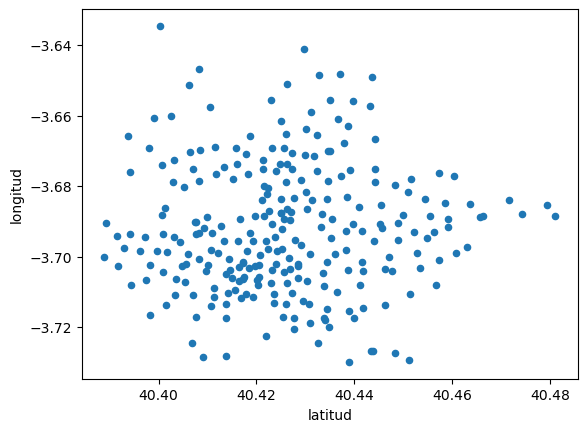

In [78]:
import matplotlib.pyplot as plt

plt.close("all")

df2.plot.scatter(x="latitud", y="longitud");

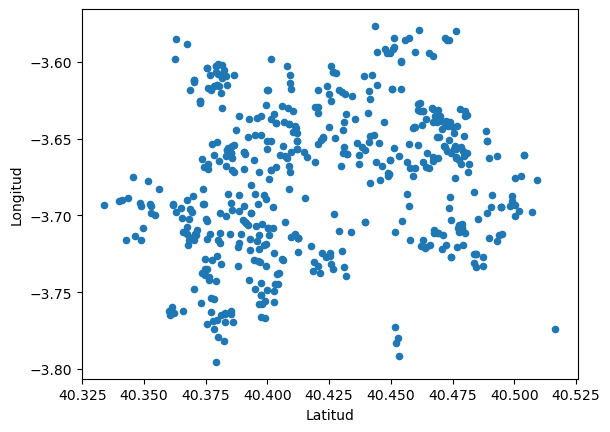

In [79]:
df_dep.plot.scatter(x="Latitud", y="Longitud");

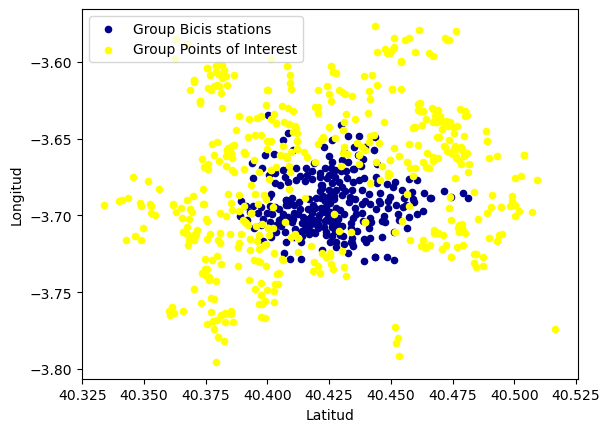

In [80]:
ax = df2.plot.scatter(x="latitud", y="longitud", color="DarkBlue", label="Group Bicis stations")

df_dep.plot.scatter(x="Latitud", y="Longitud", color="Yellow", label="Group Points of Interest", ax=ax);

In [81]:
%%time
for i in range(len(df_dep)):
    extract_rows(df2, df_dep.iloc[i][1], df_dep.iloc[i][2])


UFuncTypeError: ufunc 'subtract' did not contain a loop with signature matching types (dtype('float64'), dtype('<U21')) -> None

In [82]:
df_dep['BiciMad Station'] = closest

In [83]:
df_dep['Latitud'].idxmin()

133

In [84]:
df_dep.loc[133]

Name                Instalación Deportiva Municipal Básica Colonia...
Type of place                                   Instalación deportiva
Latitud                                                     40.333933
Longitud                                                    -3.693125
Address                                           Avenida Marconi S/N
Bicimad Station                                       Embajadores 191
Station Location                                      Calle Sodio, 1B
BiciMad Station     name                Embajadores 191
latitud   ...
Name: 133, dtype: object

In [85]:
df_dep

,Name,Type of place,Latitud,Longitud,Address,Bicimad Station,Station Location,BiciMad Station
0,Instalación Deportiva Básica Embalse de San Juan,Instalación deportiva,40.362643,-3.598148,Calle Embalse De San Juan 1,Pavones,"Calle Hacienda de Pavones, 342",name Pav...
1,Instalación Deportiva Básica Alto del Retiro,Instalación deportiva,40.367515,-3.588265,Calle Alto Del Retiro 13 C/V Calle Antonio Gades,Pavones,"Calle Hacienda de Pavones, 342",name Pav...
2,Instalación Deportiva Básica Avenida de Cerro ...,Instalación deportiva,40.368619,-3.618357,Avenida Cerro Milano 1,Pavones,"Calle Hacienda de Pavones, 342",name Pav...
3,Instalación Deportiva Básica Avenida de las Su...,Instalación deportiva,40.370297,-3.612067,Avenida Avenida De Las Suertes,Pavones,"Calle Hacienda de Pavones, 342",name Pav...
4,Instalación Deportiva Básica Avenida del Ensan...,Instalación deportiva,40.370297,-3.612067,Avenida Ensanche De Vallecas 11,Pavones,"Calle Hacienda de Pavones, 342",name Pav...
...,...,...,...,...,...,...,...,...
498,Instalación Deportiva Municipal Rocódromo 'Roc...,Instalación deportiva,40.399273,-3.718824,Avenida Manzanares 108,Marqués de Vadillo,"Glorieta Marqués de Vadillo, 9",name Marqués de Vad...
499,Instalación deportiva municipal básica Campo d...,Instalación deportiva,40.397186,-3.751840,Calle Cuart De Poblet 6,Caramuel,"Calle Caramuel, 51",name Caramuel latitud...
500,Parque Lineal UZI 0.06 Arroyofresno,Instalación deportiva,40.487147,-3.732863,Calle Maria De Maeztu 1,Facultad Derecho,"Avenida Complutense, 23",name Facultad Derecho la...
501,Pista de Patinaje Paco de Lucía,Instalación deportiva,40.385278,-3.764155,Auditorio Paco De Lucia,Caramuel,"Calle Caramuel, 51",name Caramuel latitud...


In [86]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [87]:
def process_place(place, df_bici):
    close_places = []
    for i, row in df_dep.iterrows():
        if fuzz.partial_ratio(row['Name'], place) > 80:
            #print(row['Latitud'])
            #print(row['Longitud'])
            
            close_places.append(closest_point(row['Latitud'], row['Longitud'], df_bicis))
    return close_places

In [88]:
process_place('retiro', df_dep)

NameError: name 'df_bicis' is not defined

In [89]:
%%time
for i, row in df_dep.iterrows():
    if fuzz.partial_ratio(row['Name'], 'retiro') > 80:
        serie = closest_point(row[2], row[3], df2)
        serie['Bicimad Station'] = row[0]
        serie['Station Adrress'] = row[4]
        print(serie)


name                                                         Pavones
latitud                                                    40.400368
longitud                                                    -3.63458
Station Location                      Calle Hacienda de Pavones, 342
Bicimad Station         Instalación Deportiva Básica Alto del Retiro
Station Adrress     Calle Alto Del Retiro 13 C/V Calle Antonio Gades
Name: 223, dtype: object
name                                                    Antonio Maura
latitud                                                     40.416683
longitud                                                    -3.689419
Station Location                              Calle Antonio Maura, 15
Bicimad Station     Instalación Deportiva Municipal Básica Circuit...
Station Adrress                                     Parque El Retiro 
Name: 64, dtype: object
name                                                      Pedro Bosch
latitud                                        

In [90]:
def closest_point(lat, long, df):
    dist_min = 500000
    point = ""
    for i, j in df.iterrows():
        dist = distance_meters(lat, long, j['latitud'], j['longitud'])[0]
        if (dist < dist_min):
            dist_min = dist
            point = j
    return point


In [92]:
df5 = pd.read_csv("./data/result1.csv)")
df5

FileNotFoundError: [Errno 2] No such file or directory: './data/result1.csv)'